In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.5 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 21.5 MB/s  0:00:01 eta 0:00:01
Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.6/783.6 kB 20.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 23.4 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/6 [numpy]
      Successfully uninstalled numpy-1.26.4━━━━━━━━━━━━━━━━━━━ 1/6 [numpy]
  Attempting uninstall: opencv-python90m━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/6 [polars]
    Found existing installation: opencv-python 4.5.5.64━━━━━━━ 2/6 [polars]
    Uninstalling opencv-python-4.5.5.64:━━━━━━━━━━━━━━━

In [2]:
import torch
print(torch.backends.mps.is_available())

True


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import glob
from PIL import Image

model = YOLO("yolov8s.pt")

results = model.train(
    data="screen_check_merged/data.yaml",
    epochs=50,
    imgsz=512,
    batch=8,
    device="mps"
)

# Находим results.png
result_img = glob.glob("runs/detect/train*/results.png")[0]
img = Image.open(result_img)

plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")
plt.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/xworui/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/Users/xworui/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


New https://pypi.org/project/ultralytics/8.3.230 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.229 🚀 Python-3.9.6 torch-2.8.0 MPS (Apple M3)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=screen_check_merged/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, opti

Python(9998) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<Figure size 1000x700 with 1 Axes>

: 

In [12]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

metrics = model.val(
    data="screen_check_merged/data.yaml",  # путь к YAML датасета
    imgsz=512,
    split="test"  # обязательно указываем тестовую выборку
)

print(metrics)


Ultralytics 8.3.229 🚀 Python-3.9.6 torch-2.8.0 CPU (Apple M3)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 136.4±37.4 MB/s, size: 32.5 KB)
val: Scanning /Users/xworui/.vscode/project/screen_check_merged/test/labels... 38 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 38/38 2.4Kit/s 0.0s
val: New cache created: /Users/xworui/.vscode/project/screen_check_merged/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 1.7s/it 5.1s4.8ss
                   all         38         38      0.893       0.78      0.927      0.806
            aliexpress          3          3      0.499          1      0.746      0.693
                google          3          3      0.747          1      0.995       0.84
             pinterest          4          4       0.79          1      0.995      0.907
                 steam          6         

Using image: screen_check_merged/test/images/photo_7_2025-11-06_19-35-51_jpg.rf.4987bd80fff1ca6660769786567610d6.jpg

image 1/1 /Users/xworui/.vscode/project/screen_check_merged/test/images/photo_7_2025-11-06_19-35-51_jpg.rf.4987bd80fff1ca6660769786567610d6.jpg: 256x512 1 google, 73.2ms
Speed: 1.5ms preprocess, 73.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 512)


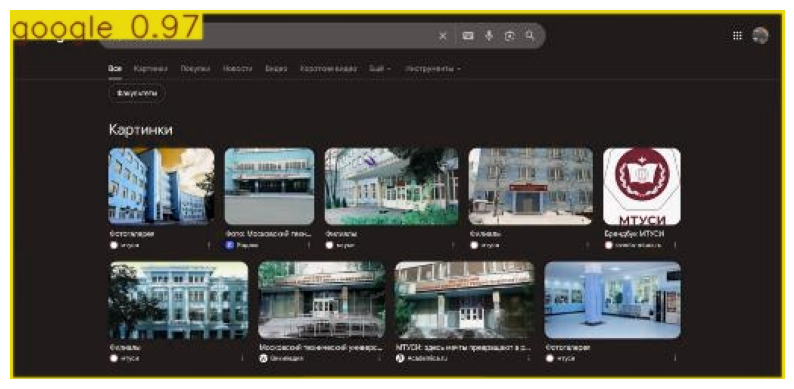

In [24]:
import random
import cv2
import matplotlib.pyplot as plt

model = YOLO("runs/detect/train/weights/best.pt")

# путь к тестовым данным
test_dir = "screen_check_merged/test/images/*.jpg"

# выбираем случайную картинку
images = glob.glob(test_dir)
random_image = random.choice(images)

print("Using image:", random_image)

# infer
results = model(random_image)

# визуализация (сохраняется в runs/detect/predict/)
results[0].show()  # открывает окно
# или:
results[0].save(filename="prediction.jpg")  # сохраняет картинку

# вывести картинку в notebook / matplotlib
img = cv2.imread("prediction.jpg")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()
